In [4]:
#bai 1 danh gia cac mo hinh hoi quy trong thu vien sklearn
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor

                  Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13   
1                   259.0          15.8263         0.0               1015.63   
2                   204.0          14.9569         0.0               1015.94   

                       Daily Summary  
0  Partly cloudy throughout the day.  
1  Partly cloudy throughout the day.  


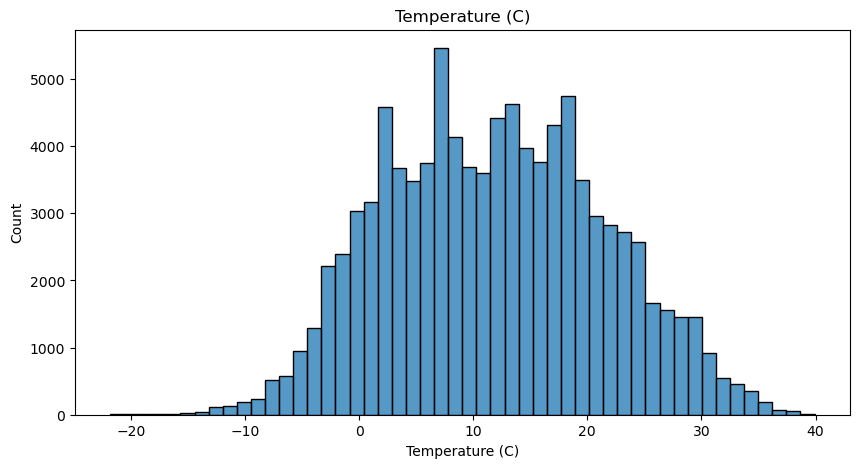

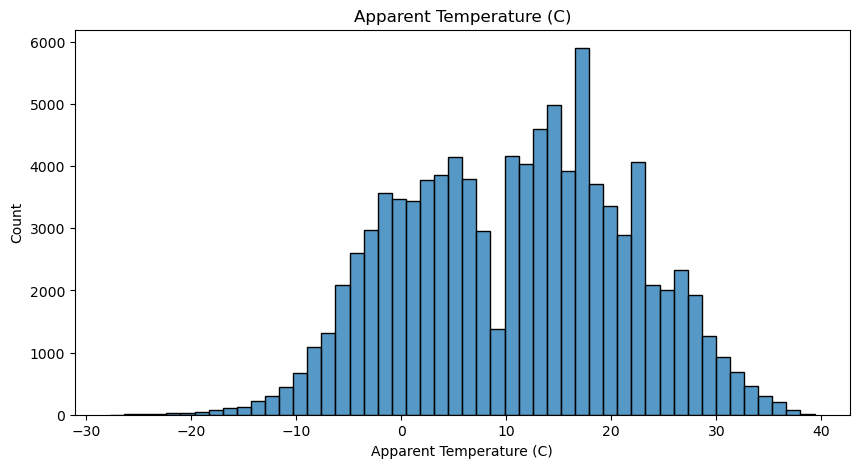

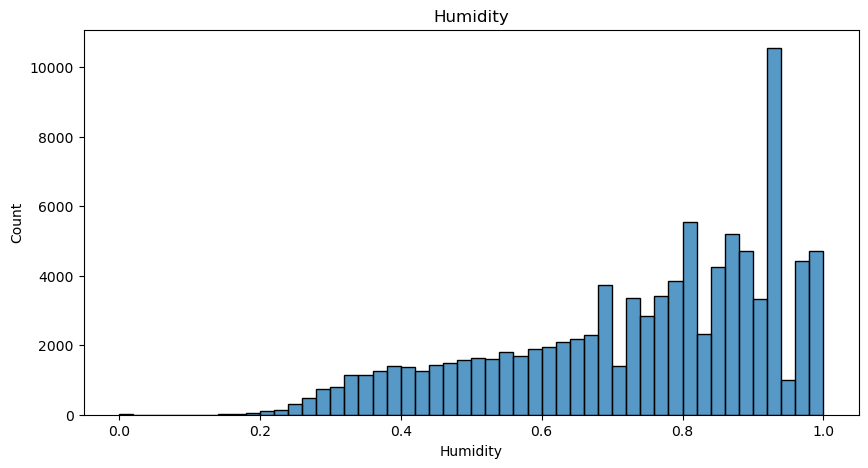

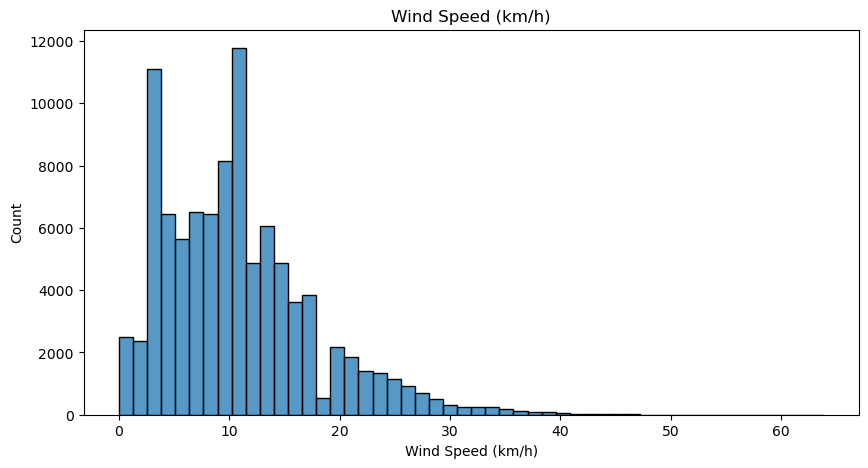

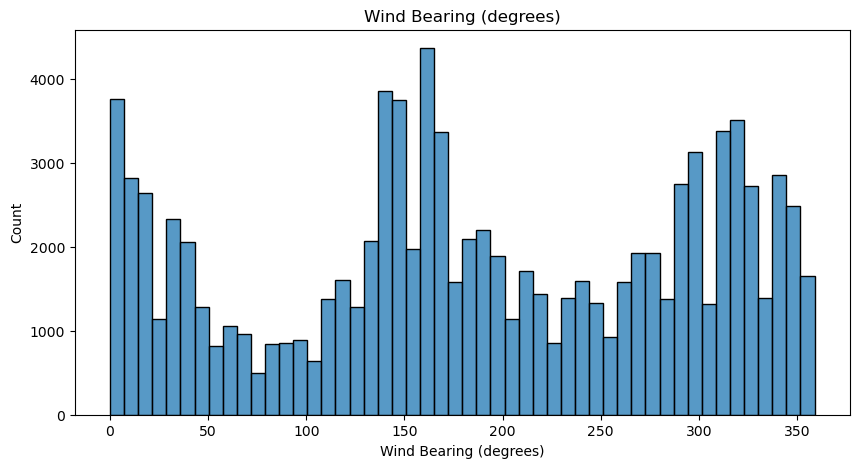

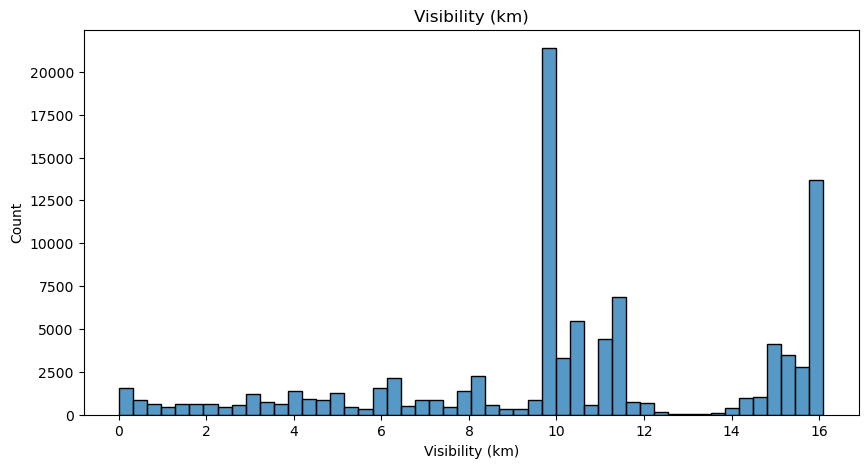

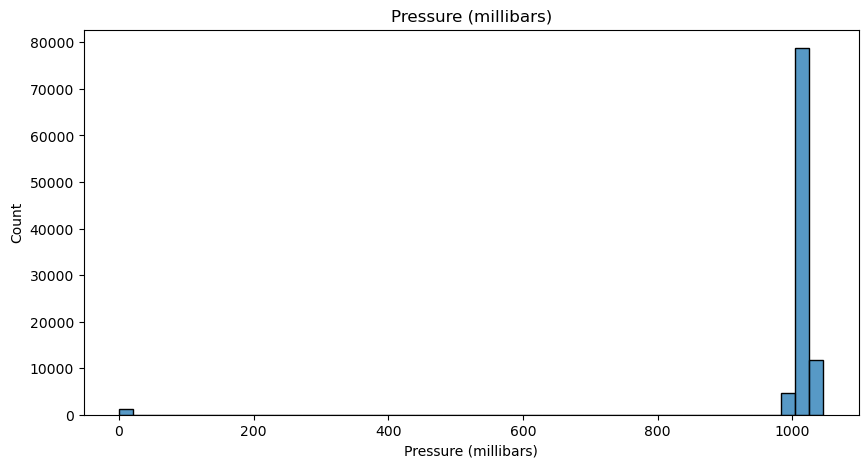

In [5]:
#nap dataframe
df = pd.read_csv("weatherHistory.csv")
print(df.head(3))

#kiem tra du lieu bi khuyet o cac cot
print(df.isnull().sum())
#danh gia dữ liệu loại định tính (Categorical, qualitative), 
#định lượng (Numerical, quantitative) và dữ liệu dạng rời rạc hay liên tục
def danh_gia(data, cat = 10, car = 30): 
    #cat_cols cot chua bien dinh tinh
    #car_cols cot chua bien dinh luong
    #cat_but_car cot chua bien dinh tinh nhung co tinh thu tu
    cat_cols = [col for col in data.columns if data[col].dtype == 'O']
    # nunique - trả về số giá trị độc lập trong 1 cột đang xét
    num_but_cat = [col for col in data.columns if data[col].nunique()<cat and data[col].dtypes != 'O']
    cat_but_car = [col for col in data.columns if data[col].nunique()>car and data[col].dtypes == 'O']
    #---------------------------------------------------------------
    cat_cols= cat_cols+ num_but_cat
    #chi lay so gia tri dinh tinh khong co tinh dinh luong
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    #---------------------------------------------------------------
    num_cols = [col for col in data.columns if data[col].dtypes != 'O']
    #chi lay so gia tri dinh luong khong co tinh dinh tinh
    num_cols = [col for col in num_cols if col not in num_but_cat]
    #-------------------------------------------------------------
    print(f'Số các bản ghi: {data.shape[0]}')
    print(f'Số các đặc trưng: {data.shape[1]}')
    print(f'Các đặc trưng dạng định tính: {len(cat_cols)}')
    print(f'Các đặc trưng dạng định lượng: {len(num_cols)}')
    print(f'Các đặc trưng định lượng nhưng có dạng định tính: {len(num_but_cat)}')
    print(f'Các đặc trưng định tính nhưng có tính thứ tự: {len(cat_but_car)}')
    return cat_cols, num_cols, cat_but_car
df_cat_cols, df_num_cols, df_cat_but_car = danh_gia(df)
#quan sát biểu đồ dữ liệu
def bieu_do_phan_bo(dataframe, num_col, plot = False):
    if plot:    
        plt.figure(figsize=(10, 5))
        sns.histplot(data=dataframe, x=num_col, bins=50)
        plt.title(num_col)
        plt.xlabel(num_col)
        plt.show()
for col in df_num_cols:
    bieu_do_phan_bo(df, col, plot = True)

['Summary', 'Precip Type', 'Loud Cover']
                                     Summary  Ratio
Partly Cloudy                          31733  32.90
Mostly Cloudy                          28094  29.13
Overcast                               16597  17.21
Clear                                  10890  11.29
Foggy                                   7148   7.41
Breezy and Overcast                      528   0.55
Breezy and Mostly Cloudy                 516   0.53
Breezy and Partly Cloudy                 386   0.40
Dry and Partly Cloudy                     86   0.09
Windy and Partly Cloudy                   67   0.07
Light Rain                                63   0.07
Breezy                                    54   0.06
Windy and Overcast                        45   0.05
Humid and Mostly Cloudy                   40   0.04
Drizzle                                   39   0.04
Breezy and Foggy                          35   0.04
Windy and Mostly Cloudy                   35   0.04
Dry                    

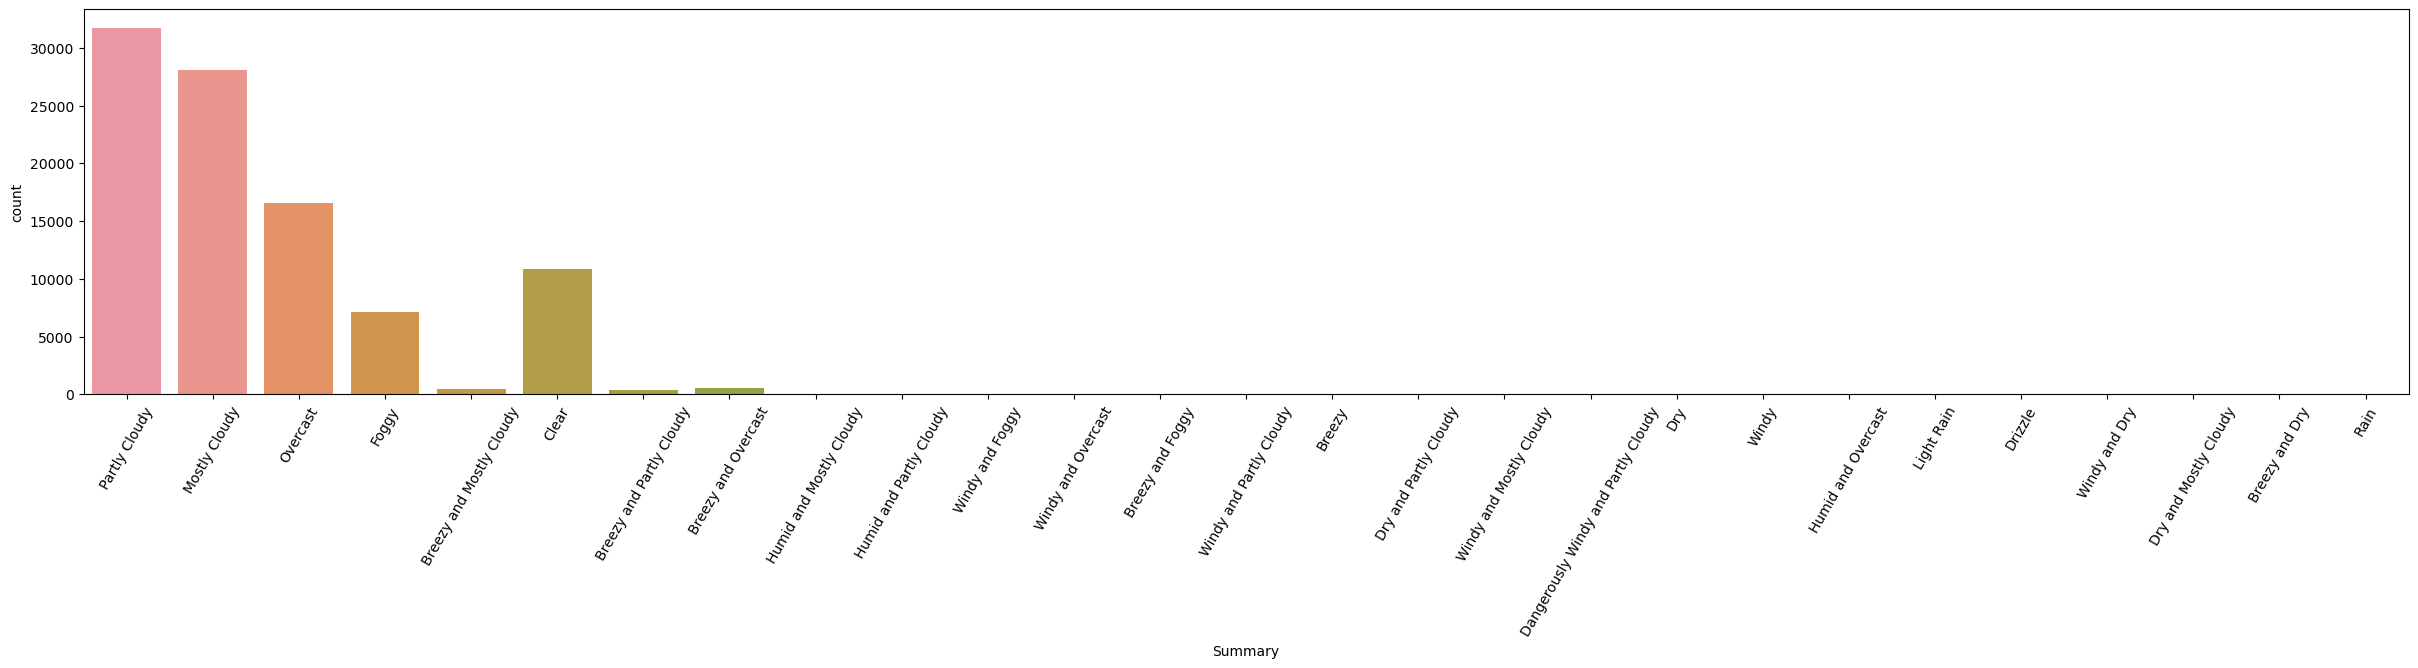

######################################################################################################################## 

      Precip Type  Ratio
rain        85224  88.36
snow        10712  11.11




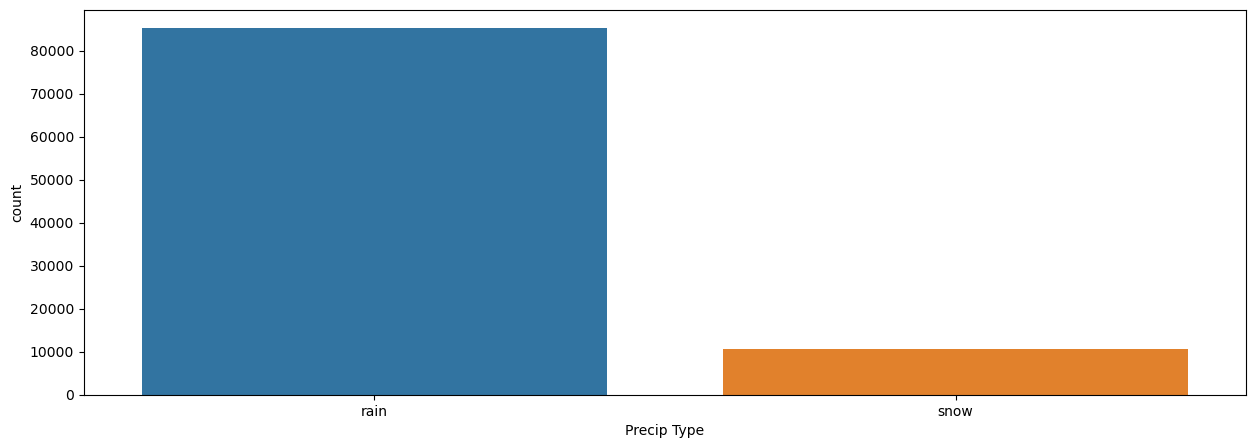

######################################################################################################################## 

     Loud Cover  Ratio
0.0       96453  100.0




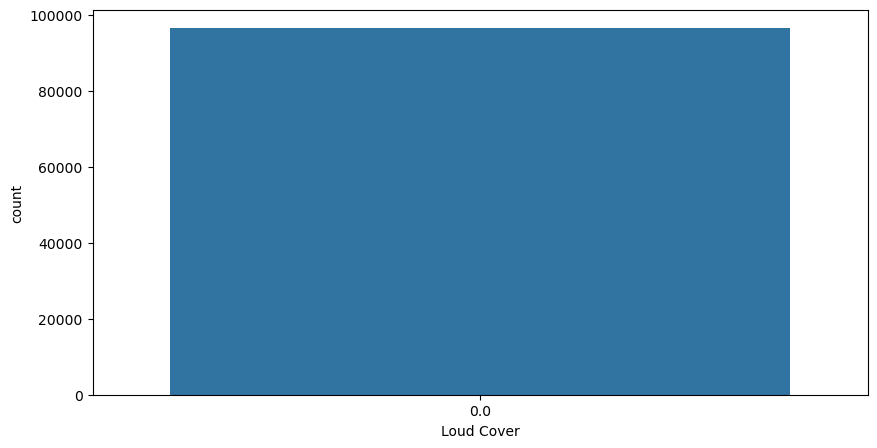

######################################################################################################################## 



'NX: ở cột Loud Cover chỉ chứa 1 đặc trưng chiếm 100% có thể drop cột này'

In [6]:
#quan sat dac trung dinh tinh 
print(df_cat_cols)
#quan sát cụ thể
def quan_sat_cat_cols(dataframe, col_name, plot = False, figsize=(10,5), xticks_rotation = 0):
    #xticks_rotation biểu thị góc nghiêng của tên thành phần 0= ngang ; 90 = dọc
    #__________________chua so gia tri cua 1 dac trung______________ty le so voi tong so
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),'Ratio': round(100*(dataframe[col_name].value_counts()) / len(dataframe), 2)}))
    print('\n')    
    if plot:
        plt.figure(figsize=figsize)
        sns.countplot(x=col_name, data=dataframe)
        plt.xticks(rotation=xticks_rotation)
        plt.show()
        #plot = true/false để xem/khong xem biểu đồ tương quan
    print(120*'#', '\n')
quan_sat_cat_cols(df, 'Summary', plot = True, figsize=(30,5), xticks_rotation = 60) 
quan_sat_cat_cols(df, 'Precip Type', plot = True, figsize=(15,5), xticks_rotation = 0)
quan_sat_cat_cols(df, 'Loud Cover', plot = True, figsize=(10,5), xticks_rotation = 0)
'''NX: ở cột Loud Cover chỉ chứa 1 đặc trưng chiếm 100% có thể drop cột này'''

In [7]:
df = df.drop('Loud Cover', axis = 1)
tuong_quan = df.corr()
tuong_quan

C:\Users\ainzo\AppData\Local\Temp\ipykernel_2192\3294859949.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tuong_quan = df.corr()


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,0.059818
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,1.000000


In [8]:
'''NX lệnh corr() thể hiện sự tương quan giữa các đại lượng có thể thấy {Temperature} và {Apparent T
 Temperature} có sự tương quan lớn với nhau, do đó ta có thể lược bớt 1 trong 2 cột'''


'NX lệnh corr() thể hiện sự tương quan giữa các đại lượng có thể thấy {Temperature} và {Apparent T\n Temperature} có sự tương quan lớn với nhau, do đó ta có thể lược bớt 1 trong 2 cột'

In [9]:
'''Xử lí dữ liệu ngoại lai Outlier
mô tả: dữ liệu ngoại lai là các dữ liệu ko có vài trò trong việc train model, có thể làm sai lệch
kết quả model train hướng tới và cần được lọc và loại bỏ'''
'''Phát hiện outlier sử dụng percentile'''
def thresholding(dataframe, col, q1=0.05, q3=0.95):
    quartile1 = dataframe[col].quantile(q1)
    quartile3 = dataframe[col].quantile(q3)
    interquantile_range = quartile3 - quartile1
    upper_limit = quartile3 + 1.5 * interquantile_range
    lower_limit = quartile1 - 1.5 * interquantile_range
    return upper_limit, lower_limit
def replace(dataframe, col):
    upper_limit, lower_limit = thresholding(dataframe, col)
    dataframe.loc[ dataframe[col] >= upper_limit, col ] = upper_limit
    dataframe.loc[ dataframe[col] <= lower_limit, col ] = lower_limit
def check(dataframe, col):
    upper_limit, lower_limit = thresholding(dataframe, col)
    if dataframe[(dataframe[col]< lower_limit)|(dataframe[col]>upper_limit)].any(axis = None):
        return True
    else:
        return False
for col in df_num_cols:
    if check(df, col):
        print(col, 'Co gai tri ngoai lai \n')
        replace(df, col)
    else:
        print(col, 'Ko co gai tri ngoai lai \n')


Temperature (C) Ko co gai tri ngoai lai 

Apparent Temperature (C) Ko co gai tri ngoai lai 

Humidity Ko co gai tri ngoai lai 

Wind Speed (km/h) Co gai tri ngoai lai 

Wind Bearing (degrees) Ko co gai tri ngoai lai 

Visibility (km) Ko co gai tri ngoai lai 

Pressure (millibars) Co gai tri ngoai lai 



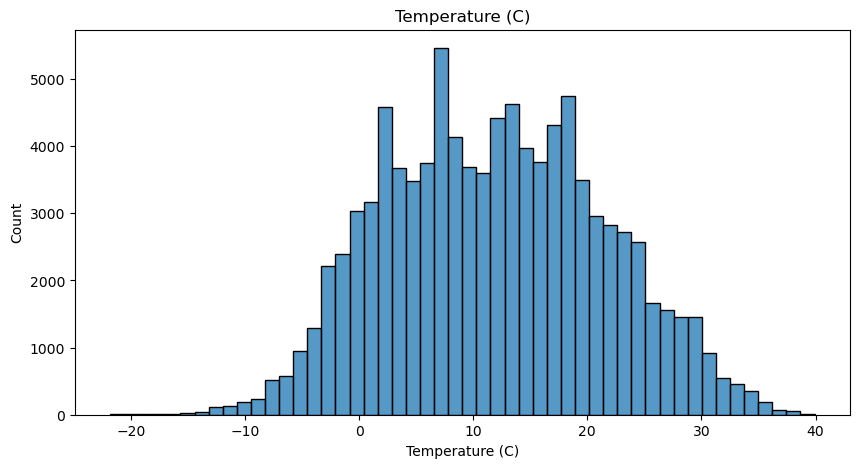

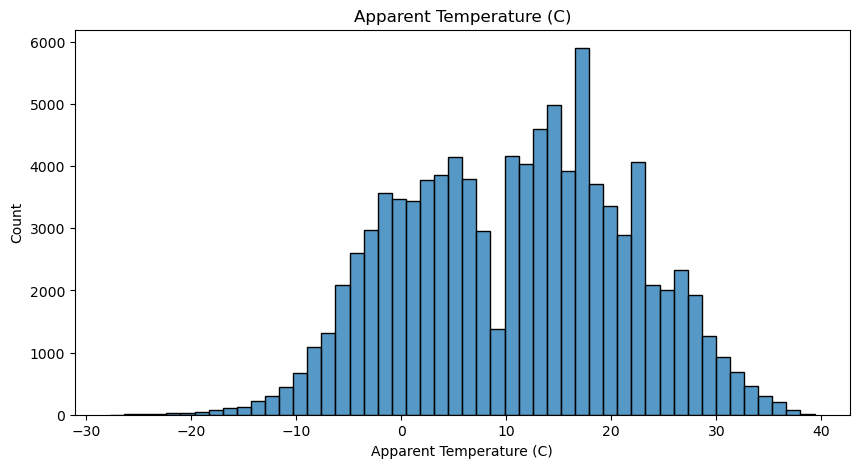

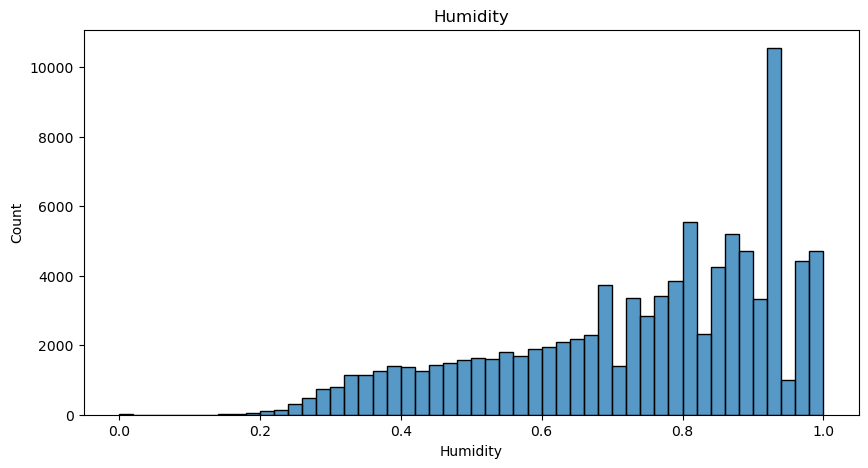

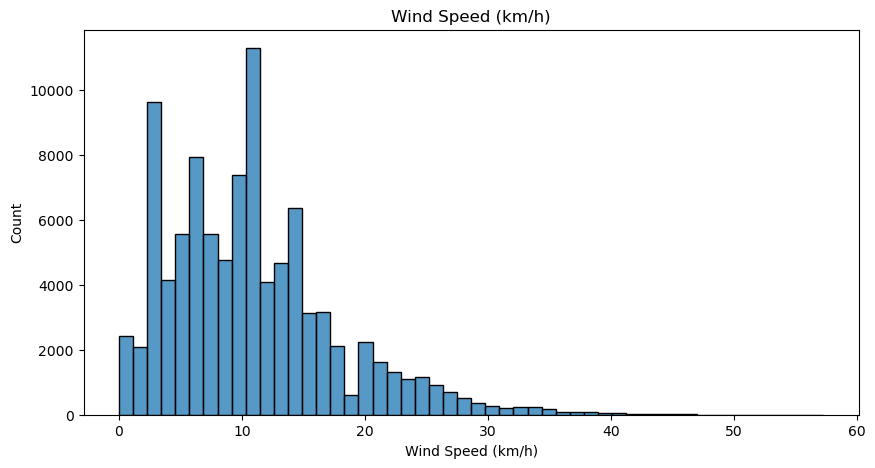

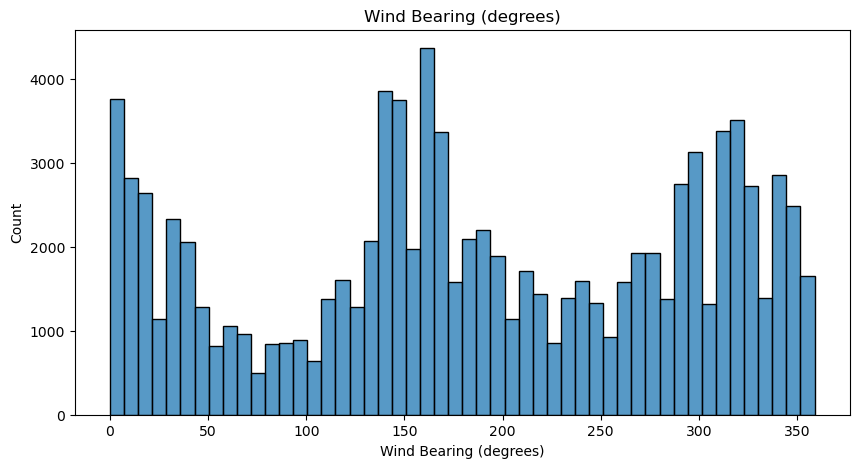

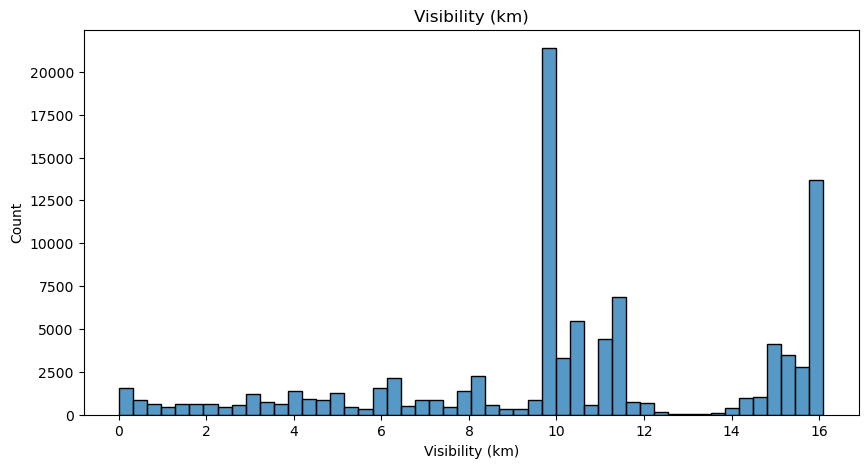

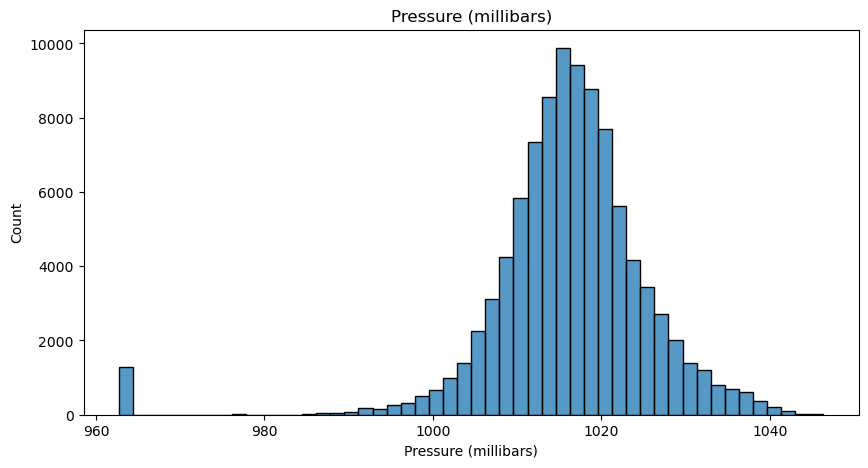

Gioi han tren Wind speed 57.28379999999977
Gioi han duoi Wind speed -30.325959999999863
Gioi han tren Pressure 1066.7199999999998
Gioi han duoi Pressure 966.96


In [10]:
#quan sát biểu đồ dữ liệu sau replace
def bieu_do_phan_bo(dataframe, num_col, plot = False):
    if plot:    
        plt.figure(figsize=(10, 5))
        sns.histplot(data=dataframe, x=num_col, bins=50)
        plt.title(num_col)
        plt.xlabel(num_col)
        plt.show()
for col in df_num_cols:
    bieu_do_phan_bo(df, col, plot = True)
'''Kiem tra Wind Speed'''
upper_limit_Wind, lower_limit_Wind = thresholding(df, 'Wind Speed (km/h)', q1 = 0.05, q3 =0.95)
print(f'Gioi han tren Wind speed {upper_limit_Wind}')
print(f'Gioi han duoi Wind speed {lower_limit_Wind}')
'''Kiem tra Pressure'''
upper_limit_Pressure, lower_limit_Pressure = thresholding(df, 'Pressure (millibars)', q1= 0.06, q3=0.94)
print(f'Gioi han tren Pressure {upper_limit_Pressure}')
print(f'Gioi han duoi Pressure {lower_limit_Pressure}')
# replace(df, 'Pressure (millibars)')

In [11]:
'''Bồi đắp giá trị khuyết thiếu'''
print(df.isnull().sum())
'''Nhân xét : có 517 giá trị Na/N ở cột Precip Type '''
# in giá trị có trong Precip Type 
print(df['Precip Type'].unique())
# Điền giá trị khuyết thiếu = "No_precip"
df.loc[df['Precip Type'].isnull(), 'Precip Type'] = 'No_precip'

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64
['rain' 'snow' nan]


In [12]:
'''Trích tách đặc trưng'''
df.head(3)
'''nx: cỘT Daily Summary ko có tác dụng train mô hình và cột Formatted Date cần trích xuất từng đặc trưng'''
df = df.drop('Daily Summary', axis = 'columns')
# Trich xuat dac trung ngay, thang, nam , gio
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], format='%Y-%m-%d %H:%M:%S.%f %z', utc=True)
df['Year'] = df['Formatted Date'].dt.year
df['Month'] = df['Formatted Date'].dt.month
df['Day'] = df['Formatted Date'].dt.day
df['Hour'] = df['Formatted Date'].dt.hour
df = df.drop('Formatted Date', axis = 'columns')
print(df.head(3))

         Summary Precip Type  Temperature (C)  Apparent Temperature (C)  \
0  Partly Cloudy        rain         9.472222                  7.388889   
1  Partly Cloudy        rain         9.355556                  7.227778   
2  Mostly Cloudy        rain         9.377778                  9.377778   

   Humidity  Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
0      0.89            14.1197                   251.0          15.8263   
1      0.86            14.2646                   259.0          15.8263   
2      0.89             3.9284                   204.0          14.9569   

   Pressure (millibars)  Year  Month  Day  Hour  
0               1015.13  2006      3   31    22  
1               1015.63  2006      3   31    23  
2               1015.94  2006      4    1     0  


In [13]:
'''Gom du lieu it xuat hien trong SUMMARY'''
df['Summary'].value_counts()/len(df['Summary'])
def Count(df, rate_rare):
    copy_df = df.copy() 
    rare_columns = [col for col in copy_df.columns if ((copy_df[col].dtype == 'O') and ((copy_df[col].value_counts() / len(copy_df)) < rate_rare).any(axis=0))]
    return rare_columns
print(df.head(3))
def re_(df, col, rate_rare):
    for i in df[col].unique():
        if df[col].value_counts()[i]/len(df[col]) < rate_rare:
            df[col] = df[col].replace(i, 'Rare')
         
re_(df, 'Summary', 0.01)
print(df['Summary'].value_counts())                                                  

         Summary Precip Type  Temperature (C)  Apparent Temperature (C)  \
0  Partly Cloudy        rain         9.472222                  7.388889   
1  Partly Cloudy        rain         9.355556                  7.227778   
2  Mostly Cloudy        rain         9.377778                  9.377778   

   Humidity  Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
0      0.89            14.1197                   251.0          15.8263   
1      0.86            14.2646                   259.0          15.8263   
2      0.89             3.9284                   204.0          14.9569   

   Pressure (millibars)  Year  Month  Day  Hour  
0               1015.13  2006      3   31    22  
1               1015.63  2006      3   31    23  
2               1015.94  2006      4    1     0  
Partly Cloudy    31733
Mostly Cloudy    28094
Overcast         16597
Clear            10890
Foggy             7148
Rare              1991
Name: Summary, dtype: int64


In [14]:
Summary = pd.get_dummies(df['Summary'])
df = df.drop('Summary', axis = 'columns')
print(df.head(3))
df = pd.concat([Summary, df], axis = 'columns')
print(df.head(3))
df_cat_cols, df_num_cols, df_cat_but_car = danh_gia(df)

  Precip Type  Temperature (C)  Apparent Temperature (C)  Humidity  \
0        rain         9.472222                  7.388889      0.89   
1        rain         9.355556                  7.227778      0.86   
2        rain         9.377778                  9.377778      0.89   

   Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
0            14.1197                   251.0          15.8263   
1            14.2646                   259.0          15.8263   
2             3.9284                   204.0          14.9569   

   Pressure (millibars)  Year  Month  Day  Hour  
0               1015.13  2006      3   31    22  
1               1015.63  2006      3   31    23  
2               1015.94  2006      4    1     0  
   Clear  Foggy  Mostly Cloudy  Overcast  Partly Cloudy  Rare Precip Type  \
0      0      0              0         0              1     0        rain   
1      0      0              0         0              1     0        rain   
2      0      0            

In [15]:
'''SCACLING'''
scaler = StandardScaler()


Index(['Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Pressure (millibars)', 'Year', 'Month', 'Day',
       'Hour'],
      dtype='object')

In [1]:
for col in scaler_col:
    df[col] = scaler.fit_transform(df[[col]])
df = df.drop("Apparent Temperature (C)", axis = 'columns')
df.head(3)

NameError: name 'scaler_col' is not defined

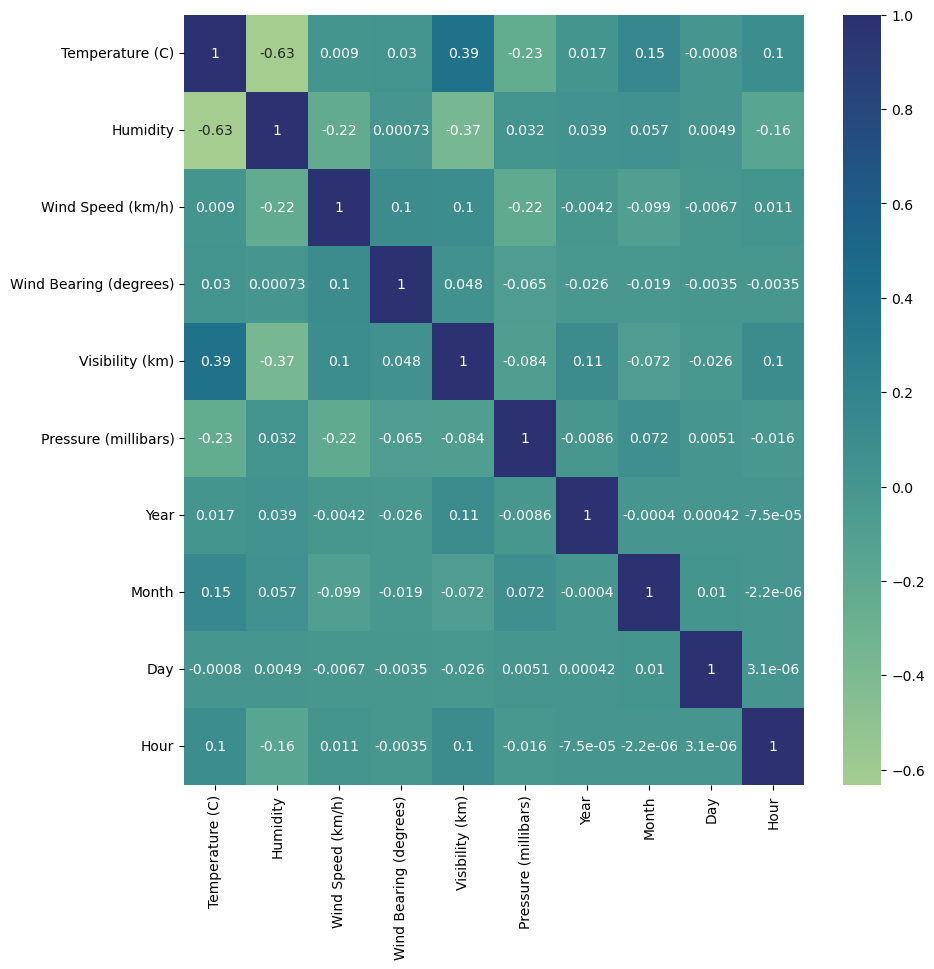

In [18]:
df_num_cols.remove('Apparent Temperature (C)')
plt.figure(figsize=(10, 10))
sns.heatmap(df[df_num_cols].corr(), annot=True, cmap='crest')
plt.show()

In [19]:
'''Xây dựng mô hình để đánh giá'''
# Sử dụng RMSE để đánh giá, lựa chọn mô hình
X = df.drop("Temperature (C)", axis = 'columns')
y = df["Temperature (C)"]
precip_ = pd.get_dummies(X['Precip Type'])
X = pd.concat([X, precip_], axis = 'columns')
X = X.drop('Precip Type', axis = 'columns')

In [22]:
alist = [
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor())
        ]
for a , b in alist:
    rmse = np.mean(np.sqrt(-cross_val_score(b, X, y, cv=5, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({a})")

RMSE: 4.3547 (CART)
RMSE: 3.3597 (RF)
RMSE: 3.1948 (GBM)
RMSE: 3.2625 (XGBoost)
RMSE: 3.0933 (LightGBM)


In [29]:
'''Nx: RMSE trung bình của mô hình LightGBM thấp nhất => chọn mô hình này để train model'''
Light = LGBMRegressor()
Light.fit(X,y)
'''tối đa tham số'''
lgbm_params = {"learning_rate": [0.01, 0.1],
                   "n_estimators": [500, 1000, 5000]}
LGBM_BEST = GridSearchCV(Light, lgbm_params,cv=5)
'''=> tổng 6 model cần train trong grid'''
LGBM_BEST.fit(X, y)


GridSearchCV(cv=5, estimator=LGBMRegressor(),
             param_grid={'learning_rate': [0.01, 0.1],
                         'n_estimators': [500, 1000, 5000]})

In [38]:
print(LGBM_BEST.best_params_)
a= LGBM_BEST.best_score_
a

{'learning_rate': 0.01, 'n_estimators': 1000}


0.893667096349321

In [43]:
'''quan sát bảng  chứa đánh giá model bởi grid search cv'''
table = pd.DataFrame(LGBM_BEST.cv_results_)
table = table.sort_values('rank_test_score')
table.to_csv('table.csv')